<a href="https://colab.research.google.com/github/venkatasurendram/git-github-tutorial/blob/master/NLP_Venkata_Surendra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Text Preprocessing Techniques

# Data Acquisition

The dataset used here is taken from "Kaggle"
https://www.kaggle.com/datasets/hkapoor/covid19-india-news-headlines-for-nlp

In [58]:
import pandas as pd
import re
from datetime import datetime
import random
import nltk
nltk.download('punkt')

!pip install googletrans==4.0.0-rc1
!pip install jedi==0.18.1

from nltk.corpus import wordnet
from googletrans import Translator

# Download NLTK data for synonym replacement
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load the dataset
df = pd.read_csv("/content/raw_data.csv")

# Display the first few rows of the dataframe
print(df.head(15))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


    Sno        Date                                           Headline  Covid  \
0     0  2020-04-29  Coronavirus cases reach 2,438 in Rajasthan; 81...      1   
1     1  2020-04-29  Coronavirus cases in Delhi surge to 3,439 afte...      1   
2     2  2020-04-30  Anguished, I'll always recall our interactions...      0   
3     3  2020-04-30  It's a terrible week for Indian cinema: Rahul ...      0   
4     4  2020-04-30  Delhi Police perform 'parikrama' of AIIMS to t...      1   
5     5  2020-04-30   MP government offices resume work with 30% staff      1   
6     6  2020-04-30  Over 6k labourers, students brought back to J&...      1   
7     7  2020-04-30  127 new COVID-19 cases in Pune district in 12 ...      1   
8     8  2020-04-30  Journalist among 10 new COVID-19 cases reporte...      1   
9     9  2020-04-30  Maha's Nashik district reports 71 new cases, i...      1   
10   10  2020-04-30  22 new cases of COVID-19 in Karnataka, total c...      1   
11   11  2020-04-30  Sanitat

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# Data Exploration

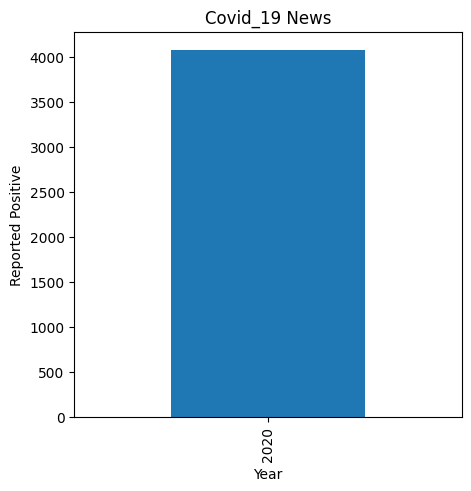

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
# Ensure 'Date' is in datetime format and extract the year
df = pd.read_csv("/content/raw_data.csv")
df['year'] = pd.to_datetime(df['Date']).dt.year

# Plot the number of headlines per year
df['year'].value_counts().sort_index().plot(kind='bar', figsize=(5, 5))
plt.title('Covid_19 News')
plt.xlabel('Year')
plt.ylabel('Reported Positive')
plt.show()

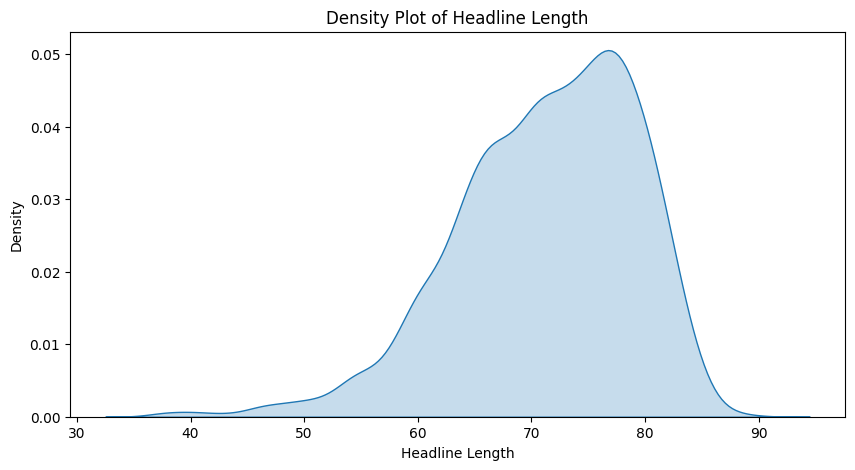

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a column for the length of each headline
df['headline_length'] = df['Headline'].apply(len)

# Plot the density plot for headline lengths
plt.figure(figsize=(10, 5))
sns.kdeplot(df['headline_length'], fill=True)
plt.title('Density Plot of Headline Length')
plt.xlabel('Headline Length')
plt.ylabel('Density')
plt.show()

Most common words in headlines:
 [('to', 1923), ('in', 1777), ('coronavirus', 1036), ('19', 845), ('covid', 830), ('for', 784), ('of', 730), ('cases', 536), ('on', 527), ('s', 493), ('govt', 486), ('lockdown', 438), ('india', 380), ('delhi', 377), ('amid', 330), ('pm', 329), ('from', 311), ('after', 277), ('1', 261), ('with', 246)]


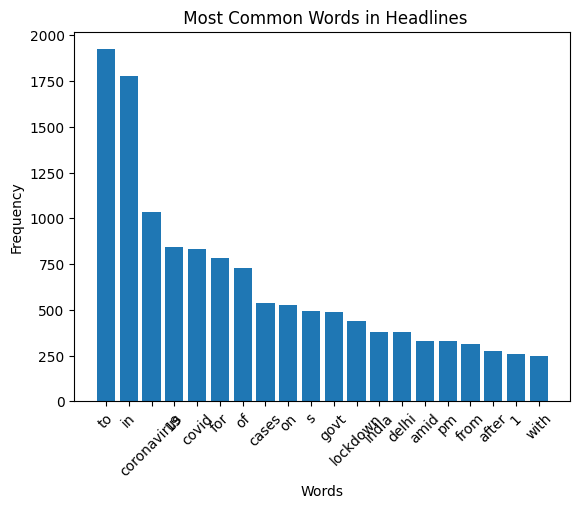

In [61]:
from collections import Counter
import re

# Function to tokenize the headlines into words
def tokenize(text):
    text = re.sub(r'\W+', ' ', text)  # Remove non-alphanumeric characters
    return text.lower().split()

# Apply the tokenization function to the headlines
df['tokens'] = df['Headline'].apply(tokenize)

# Flatten the list of tokens and count word frequencies
all_words = [word for tokens in df['tokens'] for word in tokens]
word_freq = Counter(all_words)

# Display the 20 most common words
common_words = word_freq.most_common(20)
print("Most common words in headlines:\n", common_words)

# Plot the most common words
words, counts = zip(*common_words)
plt.bar(words, counts)
plt.title(' Most Common Words in Headlines')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Text Preprocessing Techniques



# Text Extraction and Cleanup


In [62]:
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = text.strip()
    return text

from datetime import datetime

def format_date(date_str):
    # Convert the string to a datetime object with the correct format
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    # Format the datetime object to a string in the desired format
    formatted_date = date_obj.strftime('%Y-%m-%d')
    return formatted_date

# Example
df['formatted_date'] = df['Date'].apply(format_date)

# Display the cleaned text
print(df[['Date', 'formatted_date']].head())


# Apply the text cleaning function to the 'headline' column
df['cleaned_headline'] = df['Headline'].apply(clean_text)
# Apply the date formatting function
df['formatted_date'] = df['Date'].apply(format_date)

# Display the cleaned text
print(df[['Date', 'formatted_date', 'Headline', 'cleaned_headline']].head(15))


         Date formatted_date
0  2020-04-29     2020-04-29
1  2020-04-29     2020-04-29
2  2020-04-30     2020-04-30
3  2020-04-30     2020-04-30
4  2020-04-30     2020-04-30
          Date formatted_date  \
0   2020-04-29     2020-04-29   
1   2020-04-29     2020-04-29   
2   2020-04-30     2020-04-30   
3   2020-04-30     2020-04-30   
4   2020-04-30     2020-04-30   
5   2020-04-30     2020-04-30   
6   2020-04-30     2020-04-30   
7   2020-04-30     2020-04-30   
8   2020-04-30     2020-04-30   
9   2020-04-30     2020-04-30   
10  2020-04-30     2020-04-30   
11  2020-04-30     2020-04-30   
12  2020-04-30     2020-04-30   
13  2020-04-30     2020-04-30   
14  2020-04-30     2020-04-30   

                                             Headline  \
0   Coronavirus cases reach 2,438 in Rajasthan; 81...   
1   Coronavirus cases in Delhi surge to 3,439 afte...   
2   Anguished, I'll always recall our interactions...   
3   It's a terrible week for Indian cinema: Rahul ...   
4   Delhi Po


# Synonym Replacement

In [63]:
def replace_synonyms(text):
    words = text.split()
    new_words = []
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = random.choice(synonyms).lemmas()[0].name()
            new_words.append(synonym if synonym != word else word)
        else:
            new_words.append(word)
    return ' '.join(new_words)

# Apply the synonym replacement function to the cleaned text
df['synonym_replaced'] = df['cleaned_headline'].apply(replace_synonyms)

# Display the results
print(df[['cleaned_headline', 'synonym_replaced']].head(15))


                                     cleaned_headline  \
0   Coronavirus cases reach  in Rajasthan  patient...   
1   Coronavirus cases in Delhi surge to  after  ne...   
2   Anguished Ill always recall our interactions P...   
3   Its a terrible week for Indian cinema Rahul Ga...   
4   Delhi Police perform parikrama of AIIMS to tha...   
5       MP government offices resume work with  staff   
6   Over k labourers students brought back to JK i...   
7   new COVID cases in Pune district in  hours tot...   
8   Journalist among  new COVID cases reported in ...   
9   Mahas Nashik district reports  new cases inclu...   
10      new cases of COVID in Karnataka total crosses   
11  Sanitation worker donates  months salary to Te...   
12  more traders in Delhis Azadpur Mandi test coro...   
13  Karnataka converts state transport bus into Mo...   
14  US praises India for lifting export restrictio...   

                                     synonym_replaced  
0   Coronavirus sheath reach In

In [64]:
pip install googletrans==4.0.0-rc1


In [65]:
pip install deep_translator

# Back Translated

In [66]:
from deep_translator import GoogleTranslator
import time
import pandas as pd

# Define the back_translate function
def back_translate(text):
    try:
        # Translate from English to German
        translator_en_de = GoogleTranslator(source='en', target='de')
        translated = translator_en_de.translate(text)

        # Translate back from German to English
        translator_de_en = GoogleTranslator(source='de', target='en')
        back_translated = translator_de_en.translate(translated)

        # Add a delay to avoid hitting rate limits
        time.sleep(1)  # 1 second delay between requests

        return translated, back_translated
    except Exception as e:
        print(f"Translation failed: {e}")
        return text, text

# Process only the first 15 rows
df_first_15 = df.head(15).copy()  # Make a copy to avoid SettingWithCopyWarning

# Apply the back_translation function to the 'synonym_replaced' column
translations = df_first_15['synonym_replaced'].apply(lambda x: pd.Series(back_translate(x)))

# Assign the translated and back_translated columns using .loc
df_first_15.loc[:, 'translated'] = translations[0]
df_first_15.loc[:, 'back_translated'] = translations[1]

# Display the results
print(df_first_15[['synonym_replaced', 'translated', 'back_translated']])


                                     synonym_replaced  \
0   Coronavirus sheath reach Indiana Rajasthan aff...   
1   Coronavirus case in Delhi surge to after new s...   
2   anguish ill constantly recall our interaction ...   
3   information_technology deoxyadenosine_monophos...   
4   Delhi patrol perform parikrama of AIIMS to tha...   
5   military_police government function resume sou...   
6   over thousand laborer scholar bring back to JK...   
7   raw COVID event in Pune zone in hours total ex...   
8   diarist among new COVID event report indium Ke...   
9   Omaha Nashik zone report newly subject include...   
10    new case of COVID Indiana Karnataka total cross   
11  sanitation actor donate calendar_month wage to...   
12  more trader in Delhi Azadpur Mandi test corona...   
13  Karnataka convert state_of_matter transmit bus...   
14  uracil praise India for lift export limitation...   

                                           translated  \
0   Coronavirus-Hülle erreiche

# Entities Replacement

In [67]:
def replace_entities(text):
    entities = {
        'India': 'CountryA',
        'Mumbai': 'CityX',
        'Delhi': 'CityY',
        # Add more entity replacements as needed
    }
    for entity, replacement in entities.items():
        text = text.replace(entity, replacement)
    return text

df_first_15['entities_replaced'] = df_first_15['back_translated'].apply(replace_entities)
print(df_first_15[['back_translated', 'entities_replaced']])


                                      back_translated  \
0   Coronavirus case reach Indiana Rajasthan affec...   
1   Coronavirus cases rise in Delhi after new issu...   
2   Fear ill constantly remember our interaction a...   
3   Information Technology Deoxyadenosine monophos...   
4   Delhi Patrol performs Parikrama of AIIMS to th...   
5   Military_Police Government function CV sour wi...   
6   Over a thousand workers were brought back to J...   
7   The total number of new COVID infections in Pu...   
8   Diary writer under new COVID incident report I...   
9   Omaha Nashik Zone Report new topic includes Po...   
10    new COVID case Indiana Karnataka Total crossing   
11  Sanitation actor donates monthly salary to Tel...   
12  More traders in Delhi Azadpur Mandi test posit...   
13  Karnataka converts State_of_Matter transmissio...   
14  Uracil – Praise for India for lifting export r...   

                                    entities_replaced  
0   Coronavirus case reach Coun

# Unicode Normalisation

In [68]:
def normalize_unicode(text):
    return text.encode('ascii', 'ignore').decode('ascii')

df_first_15['unicode_normalized'] = df_first_15['synonym_replaced'].apply(normalize_unicode)
print(df_first_15[['synonym_replaced', 'unicode_normalized']])


                                     synonym_replaced  \
0   Coronavirus sheath reach Indiana Rajasthan aff...   
1   Coronavirus case in Delhi surge to after new s...   
2   anguish ill constantly recall our interaction ...   
3   information_technology deoxyadenosine_monophos...   
4   Delhi patrol perform parikrama of AIIMS to tha...   
5   military_police government function resume sou...   
6   over thousand laborer scholar bring back to JK...   
7   raw COVID event in Pune zone in hours total ex...   
8   diarist among new COVID event report indium Ke...   
9   Omaha Nashik zone report newly subject include...   
10    new case of COVID Indiana Karnataka total cross   
11  sanitation actor donate calendar_month wage to...   
12  more trader in Delhi Azadpur Mandi test corona...   
13  Karnataka convert state_of_matter transmit bus...   
14  uracil praise India for lift export limitation...   

                                   unicode_normalized  
0   Coronavirus sheath reach In

In [69]:
pip install textblob


# Spell Correction


In [70]:
from textblob import TextBlob

def correct_spelling(text):
    blob = TextBlob(text)
    corrected_text = str(blob.correct())
    return corrected_text

df_first_15['spell_corrected'] = df_first_15['unicode_normalized'].apply(correct_spelling)
print(df_first_15[['unicode_normalized', 'spell_corrected']])


                                   unicode_normalized  \
0   Coronavirus sheath reach Indiana Rajasthan aff...   
1   Coronavirus case in Delhi surge to after new s...   
2   anguish ill constantly recall our interaction ...   
3   information_technology deoxyadenosine_monophos...   
4   Delhi patrol perform parikrama of AIIMS to tha...   
5   military_police government function resume sou...   
6   over thousand laborer scholar bring back to JK...   
7   raw COVID event in Pune zone in hours total ex...   
8   diarist among new COVID event report indium Ke...   
9   Omaha Nashik zone report newly subject include...   
10    new case of COVID Indiana Karnataka total cross   
11  sanitation actor donate calendar_month wage to...   
12  more trader in Delhi Azadpur Mandi test corona...   
13  Karnataka convert state_of_matter transmit bus...   
14  uracil praise India for lift export limitation...   

                                      spell_corrected  
0   Coronavirus sheath reach In

In [71]:
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Sentence Segmentation

In [72]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize
import nltk.data

# Manually load the Punkt tokenizer
nltk.data.load('tokenizers/punkt/english.pickle')

def segment_sentences(text):
    return sent_tokenize(text)

# Apply the sentence tokenization
df_first_15['sentences'] = df_first_15['spell_corrected'].apply(segment_sentences)

print(df_first_15[['spell_corrected', 'sentences']])


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                      spell_corrected  \
0   Coronavirus sheath reach Indiana Rajasthan aff...   
1   Coronavirus case in Delhi surge to after new s...   
2   anguish ill constantly recall our interaction ...   
3   information_technology deoxyadenosine_monophos...   
4   Delhi patrol perform parikrama of AIIMS to tha...   
5   military_police government function resume sou...   
6   over thousand laborer scholar bring back to of...   
7   raw COVID event in June zone in hours total ex...   
8   dearest among new COVID event report radium He...   
9   Omaha Nashik zone report newly subject include...   
10    new case of COVID Indiana Karnataka total cross   
11  sanitation actor donate calendar_month wage to...   
12  more trader in Delhi Azadpur And test coronavi...   
13  Karnataka convert state_of_matter transmit bus...   
14  trail praise India for lift export limitation ...   

                                            sentences  
0   [Coronavirus sheath reach I

# Word Tokenization

In [73]:
from nltk.tokenize import word_tokenize

def tokenize_words(sentences):
    return [word_tokenize(sentence) for sentence in sentences]
print(df_first_15.columns)

df_first_15['word_tokens'] = df_first_15['sentences'].apply(tokenize_words)
print(df_first_15[['sentences', 'word_tokens']])



Index(['Sno', 'Date', 'Headline', 'Covid', 'Sentiment', 'Description', 'Image',
       'Source', 'year', 'headline_length', 'tokens', 'formatted_date',
       'cleaned_headline', 'synonym_replaced', 'translated', 'back_translated',
       'entities_replaced', 'unicode_normalized', 'spell_corrected',
       'sentences'],
      dtype='object')
                                            sentences  \
0   [Coronavirus sheath reach Indiana Rajasthan af...   
1   [Coronavirus case in Delhi surge to after new ...   
2   [anguish ill constantly recall our interaction...   
3   [information_technology deoxyadenosine_monopho...   
4   [Delhi patrol perform parikrama of AIIMS to th...   
5   [military_police government function resume so...   
6   [over thousand laborer scholar bring back to o...   
7   [raw COVID event in June zone in hours total e...   
8   [dearest among new COVID event report radium H...   
9   [Omaha Nashik zone report newly subject includ...   
10  [new case of COVID Indian

In [74]:
from nltk.tokenize import sent_tokenize

def segment_sentences(text):
    return sent_tokenize(text)

df_first_15['sentences'] = df_first_15['cleaned_headline'].apply(segment_sentences)
print(df_first_15[['cleaned_headline', 'sentences']])


                                     cleaned_headline  \
0   Coronavirus cases reach  in Rajasthan  patient...   
1   Coronavirus cases in Delhi surge to  after  ne...   
2   Anguished Ill always recall our interactions P...   
3   Its a terrible week for Indian cinema Rahul Ga...   
4   Delhi Police perform parikrama of AIIMS to tha...   
5       MP government offices resume work with  staff   
6   Over k labourers students brought back to JK i...   
7   new COVID cases in Pune district in  hours tot...   
8   Journalist among  new COVID cases reported in ...   
9   Mahas Nashik district reports  new cases inclu...   
10      new cases of COVID in Karnataka total crosses   
11  Sanitation worker donates  months salary to Te...   
12  more traders in Delhis Azadpur Mandi test coro...   
13  Karnataka converts state transport bus into Mo...   
14  US praises India for lifting export restrictio...   

                                            sentences  
0   [Coronavirus cases reach  i

# Stop Word Removal

In [75]:
!pip install --upgrade nltk

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)
from nltk.tokenize import word_tokenize

def tokenize(text):
    return word_tokenize(text)

df_first_15['word_tokens'] = df_first_15['cleaned_headline'].apply(tokenize)


from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [[word for word in sentence if word.lower() not in stop_words] for sentence in tokens]

df_first_15['stopword_removed'] = df_first_15['word_tokens'].apply(remove_stopwords)
print(df_first_15[['word_tokens', 'stopword_removed']])


{'between', 'most', 'myself', 'himself', 'will', 'did', "should've", "couldn't", 'an', "needn't", "shouldn't", 'as', 'she', 'yours', 'then', 'while', 'shouldn', 'do', "doesn't", 'so', 'y', 'after', 'a', "didn't", 'the', 'with', 'mightn', "that'll", 'few', 'under', 'by', 'again', 'of', 'have', 'been', 'was', 'my', "mightn't", 'm', "you'll", "shan't", 'down', 'be', 'ours', 've', 'they', 'other', 'same', 'am', 'your', 'wasn', "haven't", 'we', 'below', 'its', 'and', 'such', 'yourselves', 'above', "hadn't", 'hadn', 'in', 'any', 'needn', "it's", 'theirs', 'because', 'during', 'hers', 'haven', 'mustn', 'it', "you've", 'd', 't', 'yourself', 'to', 'on', 'or', 'shan', 'if', 'for', 'his', 'herself', 'their', 'her', 'when', 'him', 'against', 're', "you're", 'wouldn', 'don', "hasn't", "wouldn't", 'me', 'didn', 'aren', 'being', 'from', 'about', 'than', 'too', 'doesn', 'who', 'having', 's', 'weren', 'but', 'won', 'into', 'once', 'now', 'has', 'doing', 'them', 'just', 'had', 'some', "isn't", 'all', 'o

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Normalization

In [76]:
import pandas as pd

# Step 1: Load the dataset into DataFrame df
df = pd.read_csv("/content/raw_data.csv")

# Check the first few rows to ensure it's loaded correctly
print(df.head())

# Step 2: Define df_first_5 as the first 5 rows of df
df_first_5 = df.head(5)

# Define the normalization function
def normalize_text(text):
    # Example normalization function
    normalized_text = text.lower()  # Example normalization step
    word_count = len(normalized_text.split())
    return normalized_text, word_count

# Step 3: Apply normalization and count
df_first_15[['normalized', 'word_count']] = df_first_15['spell_corrected'].apply(lambda text: pd.Series(normalize_text(text)))

# Display the results
print(df_first_15[['spell_corrected', 'normalized', 'word_count']])

   Sno        Date                                           Headline  Covid  \
0    0  2020-04-29  Coronavirus cases reach 2,438 in Rajasthan; 81...      1   
1    1  2020-04-29  Coronavirus cases in Delhi surge to 3,439 afte...      1   
2    2  2020-04-30  Anguished, I'll always recall our interactions...      0   
3    3  2020-04-30  It's a terrible week for Indian cinema: Rahul ...      0   
4    4  2020-04-30  Delhi Police perform 'parikrama' of AIIMS to t...      1   

   Sentiment                                        Description  \
0          0  Rajasthan on Wednesday reported 74 new coronav...   
1          0  The total number of coronavirus cases in Delhi...   
2          1  Condoling the demise of actor Rishi Kapoor, PM...   
3          0  Congress leader Rahul Gandhi condoled Rishi Ka...   
4          1  As a sign of respect for healthcare profession...   

                                               Image  \
0  https://static.inshorts.com/inshorts/images/v1...   
1  h

# Stemming

In [77]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

def apply_stemming(text):
    tokens = word_tokenize(text)
    stemmed = []
    stemmed_count = 0

    for word in tokens:
        stemmed_word = stemmer.stem(word)
        stemmed.append(stemmed_word)
        if word != stemmed_word:
            stemmed_count += 1

    stemmed_text = ' '.join(stemmed)
    return stemmed_text, stemmed_count


# Apply stemming and count
df_first_15[['stemmed', 'stemmed_count']] = df_first_15['normalized'].apply(lambda text: pd.Series(apply_stemming(text)))

# Display the results
print(df_first_15[['normalized', 'stemmed', 'stemmed_count']])


                                           normalized  \
0   coronavirus sheath reach indiana rajasthan aff...   
1   coronavirus case in delhi surge to after new s...   
2   anguish ill constantly recall our interaction ...   
3   information_technology deoxyadenosine_monophos...   
4   delhi patrol perform parikrama of aiims to tha...   
5   military_police government function resume sou...   
6   over thousand laborer scholar bring back to of...   
7   raw covid event in june zone in hours total ex...   
8   dearest among new covid event report radium he...   
9   omaha nashik zone report newly subject include...   
10    new case of covid indiana karnataka total cross   
11  sanitation actor donate calendar_month wage to...   
12  more trader in delhi azadpur and test coronavi...   
13  karnataka convert state_of_matter transmit bus...   
14  trail praise india for lift export limitation ...   

                                              stemmed  stemmed_count  
0   coronaviru s

# Lemmatization

In [78]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def apply_lemmatization(text):
    tokens = word_tokenize(text)
    lemmatized = []
    lemmatized_count = 0

    for word in tokens:
        lemmatized_word = lemmatizer.lemmatize(word)
        lemmatized.append(lemmatized_word)
        if word != lemmatized_word:
            lemmatized_count += 1

    lemmatized_text = ' '.join(lemmatized)
    return lemmatized_text, lemmatized_count




df_first_15[['lemmatized', 'lemmatized_count']] = df_first_15['normalized'].apply(lambda text: pd.Series(apply_lemmatization(text)))


# Apply lemmatization and count
df_first_15[['lemmatized', 'lemmatized_count']] = df_first_15['normalized'].apply(lambda text: pd.Series(apply_lemmatization(text)))

# Display the results
print(df_first_15[['normalized', 'lemmatized', 'lemmatized_count']])


                                           normalized  \
0   coronavirus sheath reach indiana rajasthan aff...   
1   coronavirus case in delhi surge to after new s...   
2   anguish ill constantly recall our interaction ...   
3   information_technology deoxyadenosine_monophos...   
4   delhi patrol perform parikrama of aiims to tha...   
5   military_police government function resume sou...   
6   over thousand laborer scholar bring back to of...   
7   raw covid event in june zone in hours total ex...   
8   dearest among new covid event report radium he...   
9   omaha nashik zone report newly subject include...   
10    new case of covid indiana karnataka total cross   
11  sanitation actor donate calendar_month wage to...   
12  more trader in delhi azadpur and test coronavi...   
13  karnataka convert state_of_matter transmit bus...   
14  trail praise india for lift export limitation ...   

                                           lemmatized  lemmatized_count  
0   coronavir